In [3]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns

# Задания для самостоятельного решения

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

**Замечание: 2** Для зачета уже достаточно половины абсолютно верно решенных заданий. 

Если возникают сложности по ходу решения - пишите свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [146]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)


Для определения взаимосвязи с выборками проведем t- тест Стьюдента


In [147]:
t, p_value = stats.ttest_ind
#Критерий Стьюдента (t-test)
t, p_value

(-1.733800647210997, 0.08451003973499756)

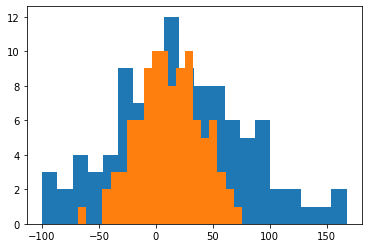

In [148]:
plt.hist(B, bins=20); #Выборка B
plt.hist(A, bins=20);  #Выборка A

т.к. p-value = 0.0845> уровня значимости 𝛼 = 0.05 , 

**Значит оснований отвергать нулевую гипотезу нет**

Распределения выборок равны.  Различия в эффекте у этих пациентов нет. 

<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [18]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

Для определения взаимосвязи с выборками проведем тест критерием Манна-Уитни

In [152]:
from scipy.stats import mannwhitneyu # Импортируем нужный тест из пакета scipy
stat, p = mannwhitneyu(A, B) # U-тест Манна-Уитни
stat, p
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Одинаковые распределения (не отвергаем H0)


Различия в эффекте у пациентов групп A и B нет. 

<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [155]:
from scipy.stats import f_oneway # импортирем функцию для дисперсионного анализа из библиотеки scipy пакета stats
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]



In [157]:
F, p = f_oneway(water, nutri, mineral)  # дисперсионный анализ (ДА) в python
F, p

(12.525963044834192, 2.9240047906326866e-05)

значение p-value 2.9240047906326866e-05 <0.05 

отклоняем нулевую версию

**Разное распределение выборок**

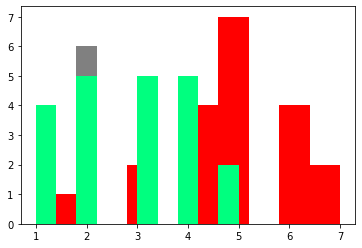

In [171]:
plt.hist(water, bins=10, color='#808080'); #Выборка вода
plt.hist(nutri, bins=10, color='#FF0000');  #Выборка вода с удобрением
plt.hist(mineral, bins=10, color='#00FF7F');  #Выборка минеральная вода


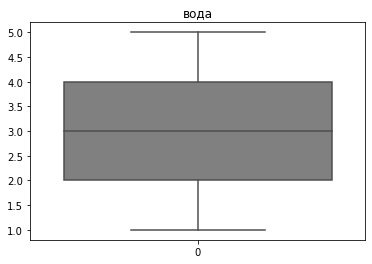

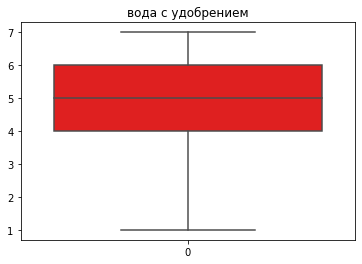

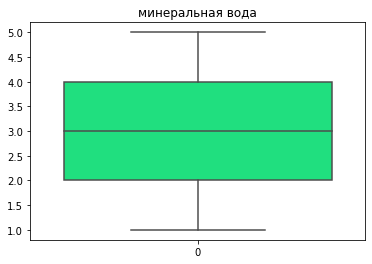

In [179]:
sns.boxplot(data=water, color='#808080').set_title('вода'); #Выборка вода
plt.show()
sns.boxplot(data=nutri, color='#FF0000').set_title('вода с удобрением');  #Выборка вода с удобрением
plt.show()
sns.boxplot(data=mineral, color='#00FF7F').set_title('минеральная вода');  #Выборка минеральная вода

**по гистограмме и боксплоту видно, что самый лучший эффект от воды с удобрением (выборка nutri)**

# Cookie Cats (Обязательно)

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотреть влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [181]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

In [258]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


видно, что цифры игроков по группам разнятся, попробуем сделать первые выводы по игрокам 

In [263]:
#Сгруппируем результаты теста по версиям игры и общему количеству игроков
users_gate_30 = len(data.loc[data.version == 'gate_30'].groupby('userid'))
users_gate_30

44700

In [264]:
#Сгруппируем результаты теста по версиям игры и общему количеству игроков
users_gate_40 = len(data.loc[data.version == 'gate_40'].groupby('userid'))
users_gate_40

45489

In [267]:
#посчитаем, сколько в среднем каждый игрок в группе gate_30 провел игр
med_games_per_user_30 = data[data.version == 'gate_30']['sum_gamerounds'].sum()/users_gate_30
med_games_per_user_30

52.45626398210291

In [268]:
#посчитаем, сколько в среднем каждый игрок в группе gate_40 провел игр
med_games_per_user_40 = data[data.version == 'gate_40']['sum_gamerounds'].sum()/users_gate_40
med_games_per_user_40

51.29877552814966

In [276]:
#Сравним средние величины игр по группам
52.456/51.299

1.0225540458878342

Первые выводы:
**Игроки из группы gates_30 в среднем проводят больше игровых раундов на 2,2%, чем игроки из группы gates_40**

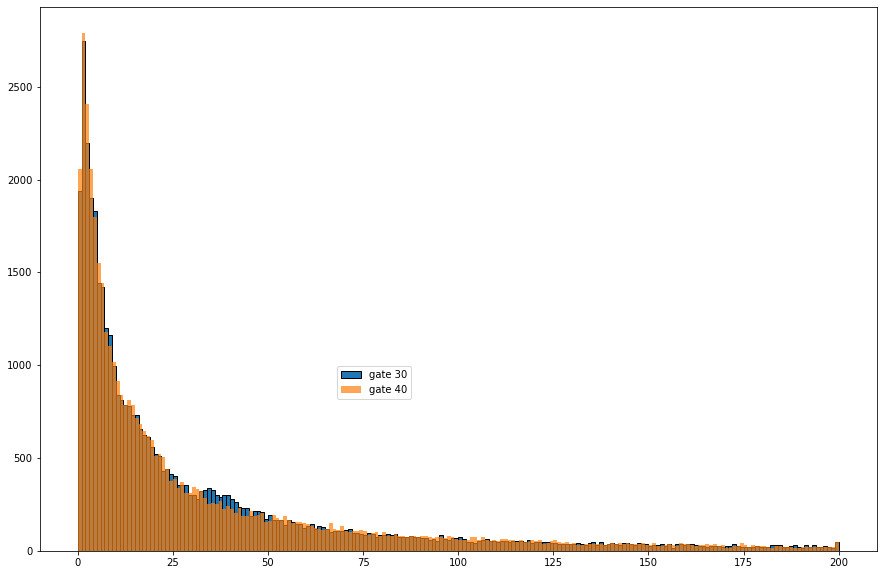

In [11]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

**Ваши выводы**

Группа gate_30 - Виден всплеск количества игроков по сравнению с gate_40, сыгравших от 30 до 50 игр
Группа gate_40 - Виден всплеск количества игроков по сравнению с gate_30, сыгравших от 0 до 6 игр

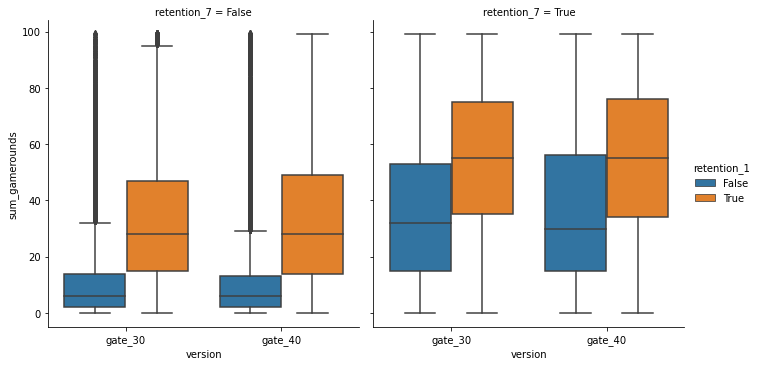

In [288]:
df = data.loc[data['sum_gamerounds'] <100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);

**gate_40- больше возвратов после 1 и 7 дней( как впервые, так и повторно)**

**gate_40 - меньше игроков, которые никогда не вернулись (ни на 1-й день, ни на 7)** 

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

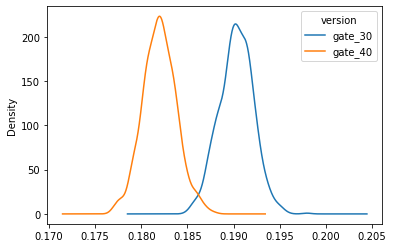

In [232]:
# #Если вдруг оказалось сложно, то вот еще один способ визуализации различий
# # Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# # Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# # A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

на графике видно, что среднее значение выборки gate_40 больше, чем у выборки gate_30

**Вывод: в выборке gate_40 больше возврат игроков через 7 дней, чем у выборки gate_30**

#### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [470]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

#Проведем анализ методом Манна-Уитни возврата игроков после 7 дней по группам gate_30 и gate_40
stat, p = mannwhitneyu(data[data.version == 'gate_30']['retention_7'], data[data.version == 'gate_40']['retention_7'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
#Проведем дисперсионный анализ тех же выборок


Statistics=1008341061.000, p=0.001


In [304]:
#Проведем дисперсиннный анализ возврата игроков после 7 дней по группам gate_30 и gate_40
fvalue, pvalue = f_oneway (data[data.version == 'gate_30']['retention_7'], data[data.version == 'gate_40']['retention_7'])
print('F-value=%.3f, p-value=%.3f' % (fvalue, pvalue))

F-value=10.014, p-value=0.002


**В обоих тестах p<0,05, что говорит об отказе от нулевой гипотезы и что распределения в выборках разное**

**Ваши выводы?** 

Несмотря на то, что игроки из группы gate_30 проводят в среднем на 2,2 процента больше игровых раундов, чем игроки из группы
gate_40, тем не менее отвечая на вопрос задания об удержании игроков- игроки лучше всего удерживаются в выборке gate_40.
 Это потверждат все тесты и графики, которые исследуют величину Ratention_7, которая возвращает категориальное значение- возврат игрока к игре через 7 дней.
 

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [366]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [471]:
#создадим датафрейм с покемонами класса Grass и Rock 
pokemon_grass_rock= pokemon.loc[((pokemon['Class 1'] == 'Grass') |(pokemon['Class 1'] == 'Rock')) &(pokemon['Class 2'].isna())]
pokemon_grass_rock.head(10)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Summ,Multipl
122,123,Tangela,Grass,NaN,65,55,115,100,40,60,False,235,411125
166,167,Chikorita,Grass,NaN,45,49,65,49,65,45,False,159,143325
167,168,Bayleef,Grass,NaN,60,62,80,63,80,60,False,202,297600
168,169,Meganium,Grass,NaN,80,82,100,83,100,80,False,262,656000
197,198,Bellossom,Grass,NaN,75,80,95,90,100,50,False,250,570000
200,201,Sudowoodo,Rock,NaN,70,100,115,30,65,30,False,285,805000
206,207,Sunkern,Grass,NaN,30,30,30,30,30,30,False,90,27000
207,208,Sunflora,Grass,NaN,75,75,55,105,85,30,False,205,309375
272,273,Treecko,Grass,NaN,40,45,35,65,55,70,False,120,63000
273,274,Grovyle,Grass,NaN,50,65,45,85,65,95,False,160,146250


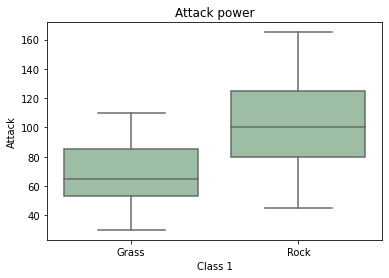

In [472]:
#сравним 2 выборки - покемонов класса Grass и Rock. Постпроим график 'ящик с усами'
ax = sns.boxplot(x='Class 1',y='Attack',data=pokemon_grass_rock, color='#99c2a2').set_title('Attack power')


In [518]:
A = pokemon_grass_rock[pokemon_grass_rock['Class 1'] == 'Grass']
B = pokemon_grass_rock[pokemon_grass_rock['Class 1'] == 'Rock']                           

In [520]:
t, pvalue  = stats.ttest_ind(A['Attack'],B['Attack'])
t, pvalue

(-3.60232780765211, 0.0008620463823202559)

p.value 0.00086 < 0.05, значит H0 отвергаем. Выборки статистически различаются

**По графику видно, что профессор Оук ошибается.**

Покемоны класса Rock имеют большую силу аттаки, чем покемоны класса Grass

<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны  в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [120]:
#создадим датафрейм с покемонами класса Grass и Rock 
pokemon_water_normal= pokemon.loc[((pokemon['Class 1'] == 'Water') |(pokemon['Class 1'] == 'Normal')) &(pokemon['Class 2'].isna())]
pokemon_water_normal.head()


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,False
24,25,Rattata,Normal,NaN,30,56,35,25,35,72,False


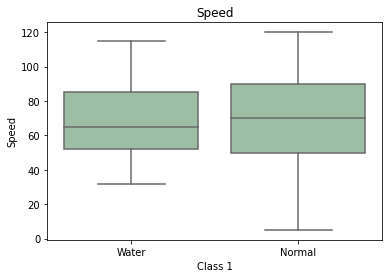

In [344]:
#сравним 2 выборки - покемонов класса Water и Normal. Постпроим график 'ящик с усами'
ax = sns.boxplot(x='Class 1',y='Speed',data=pokemon_water_normal, color='#99c2a2').set_title('Speed')


In [510]:
A = pokemon_water_normal[pokemon_water_normal['Class 1'] == 'Water']
B = pokemon_water_normal[pokemon_water_normal['Class 1'] == 'Normal']                           

In [521]:
t, pvalue  = stats.ttest_ind(A['Speed'],B['Speed'])
t, pvalue

(3.0434037399343015, 0.0041214540550091935)

p.value 0.724 > 0.05, значит H0 отвергнуть нет оснований. Выборки статистически не различаются.

**По графику видно, что профессор Оук ошибается.**

Покемоны класса Normal имеют  ту же скорость, как и покемоны класса Water

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [338]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [341]:
#создадим датафрейм только с покемонами из списка treathed_pokemon
df_treathed_pokemon = pokemon[pokemon.Name.isin(treathed_pokemon)]
df_treathed_pokemon                            

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [355]:
pokemon_without_treathed = pd.concat([pokemon, df_treathed_pokemon]).drop_duplicates(keep=False)

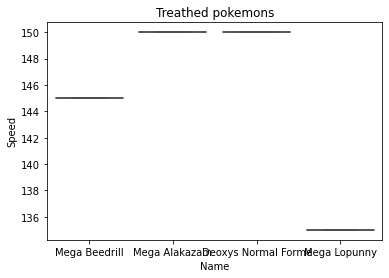

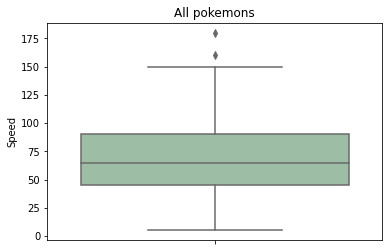

In [361]:
ax = sns.boxplot(x='Name',y='Speed',data=df_treathed_pokemon, color='#808080').set_title('Treathed pokemons')
plt.show()
bx = sns.boxplot(y='Speed',data=pokemon_without_treathed, color='#99c2a2').set_title('All pokemons')

**Вывод: сыворотка работает.**

Показатели скорости покемонов из списка treated_pokemons гораздо выше средних значений из списка и находятся
между 3-м квартилем и максимумом

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [383]:
#Добавим столбцы с суммой и произведением 3-х параметров HP,Attack,Defense
pokemon_rev = pokemon
pokemon_rev['Summ']= pokemon_rev['HP']+pokemon_rev['Attack']+pokemon_rev['Defense']
pokemon_rev['Multipl']= pokemon_rev['HP']*pokemon_rev['Attack']*pokemon_rev['Defense']
pokemon_rev.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Summ,Multipl
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204


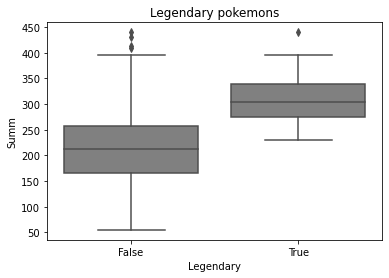

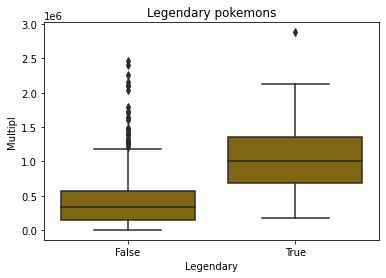

In [389]:
ax = sns.boxplot(x='Legendary',y='Summ',data=pokemon_rev, color='#808080').set_title('Legendary pokemons')
plt.show()
bx = sns.boxplot(x='Legendary',y='Multipl',data=pokemon_rev, color='#907000').set_title('Legendary pokemons')

Вывод: По боксплотам видно, что как сумма, так и произведение характеристик HP,Attack,Defense у легендарных покемонов выше (находится между 3 квартилем и максимумом) чем у других покемонов.

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил четыре класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [456]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [459]:
# для сравнения этих четырех классов по уровню Defence применим дисперсионный анализ
A = pokemon.loc[(pokemon['Class 1']  == best_defence_class[0]) | (pokemon['Class 2'] == best_defence_class[0])]
B = pokemon.loc[(pokemon['Class 1']  == best_defence_class[1]) | (pokemon['Class 2'] == best_defence_class[1])]
C = pokemon.loc[(pokemon['Class 1']  == best_defence_class[2]) | (pokemon['Class 2'] == best_defence_class[2])]
D = pokemon.loc[(pokemon['Class 1']  == best_defence_class[3]) | (pokemon['Class 2'] == best_defence_class[3])]

fvalue, pvalue = stats.f_oneway(A.Defense, B.Defense, C.Defense, D.Defense)

print(fvalue, pvalue)

10.82012408304731 1.231528168152447e-06


т.к. p-value < 0,05, значит мы отвергаем H0.
Выборки статистически отличаются по параметру Defense. Профессор Оук ошибается.